Imports

In [35]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from datetime import date, timedelta

#for ML

import numpy as np
import datetime

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from scipy.optimize import curve_fit

from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import math

##Example of RandomForestRegressor (ML pt2)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

Import files

In [36]:
def test(Sensors, df):
    Test = {}
    maxim = len(Sensors.columns)
    for i,col in enumerate(Sensors.columns):
        materials = []
        if i == maxim-1:
            for j,material in enumerate(Sensors[col]):
                f = materials.count(material)+1            
                materials.append(material)
                if list(Test.keys()).count(material + str(f)) == 1:
                    Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                        df[col:][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })])
                else:
                    Test[material + str(f)] = df[col:][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })    
        else:
            for j,material in enumerate(Sensors[col]):
                f = materials.count(material)+1            
                materials.append(material)
                if list(Test.keys()).count(material + str(f)) == 1:
                    Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                        df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })
                                                        ])
                else:
                    Test[material + str(f)] = df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })
    return Test



# Sensors_ViaBolz = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa2_timeline.csv",
#                      sep = ",")
# Sensors_ViaBolz.set_index("channel", inplace = True)
# Sensors_ViaBolz = Sensors_ViaBolz.applymap(lambda x: x.replace("*", ""))

# df_ViaBolz = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/ViaBolz.csv",
#              sep = ",",
#              parse_dates = ["ts"])
# df_ViaBolz.set_index("ts", inplace = True)

# change = {}
# for i in range(1,9):
#     change["S" +str(i)+"_R1"] = "T" + str(i)
#     change["S" +str(i)+"_R2"] = "R" + str(i)
#     change["S"+ str(i)+"_Voltage"] = "V"+str(i)
# df_ViaBolz = df_ViaBolz.rename(columns=change)
# test_ViaBolz=test(Sensors_ViaBolz, df_ViaBolz)


# Sensors_StChiara = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa1_timeline.csv",
#                      sep = ",")
# Sensors_StChiara.set_index("channel", inplace = True)
# Sensors_StChiara = Sensors_StChiara.applymap(lambda x: x.replace("*", ""))

# df_StChiara = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/StChiara.csv",
#              sep = ",",
#              parse_dates = ["ts"])
# df_StChiara.set_index("ts", inplace = True)

# change = {}
# for i in range(1,9):
#     change["S" +str(i)+"_R1"] = "T" + str(i)
#     change["S" +str(i)+"_R2"] = "R" + str(i)
#     change["S"+ str(i)+"_Voltage"] = "V"+str(i)
# df_StChiara = df_StChiara.rename(columns=change)
# test_StChiara=test(Sensors_StChiara, df_StChiara)

#ML Bea


def tempo(df):
    timezone_offset = datetime.timedelta(hours=2)
    timezone = datetime.timezone(timezone_offset)
    df.ts = df.ts.apply(lambda x: x.replace(tzinfo=timezone))
    return df.ts


Sensors = read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa1_timeline.csv",
                     sep = ",")
Sensors.set_index("channel", inplace = True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))



dfSC = read_csv("C:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/StChiara.csv",
             sep = ",",
             parse_dates = ["ts"])
dfSC.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
dfSC = dfSC.rename(columns=change)
test_Bea_StChiara = test(Sensors, dfSC)

dfSC = dfSC.apply(pd.to_numeric, errors='coerce')
dfSC = dfSC.dropna() #this has to be df1, ecc...


dfAPPA = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA1.csv", parse_dates=["Time"])
dfAPPA = dfAPPA.rename(columns={"Time": "ts"})
                                

dfAPPA.ts = tempo(dfAPPA)

dfAPPA.rename(columns = {"Time":"ts"}, inplace= True)


#########################################################################################################
Sensors2 = read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa2_timeline.csv",
                     sep = ",")
Sensors2.set_index("channel", inplace = True)
Sensors2 = Sensors2.applymap(lambda x: x.replace("*", ""))


df_ViaBolz = read_csv("C:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/ViaBolz.csv",
             sep = ",",
             parse_dates = ["ts"])
df_ViaBolz.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
df_ViaBolz = df_ViaBolz.rename(columns=change)
test_ViaBolz = test(Sensors2, df_ViaBolz)

df_ViaBolz = df_ViaBolz.apply(pd.to_numeric, errors='coerce')
df_ViaBolz = df_ViaBolz.dropna()


dfAPPA2 = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA2.csv", parse_dates=["Time"])
dfAPPA2 = dfAPPA2.rename(columns={"Time": "ts"})
                                

dfAPPA2.ts = tempo(dfAPPA2)

dfAPPA2.rename(columns = {"Time":"ts"}, inplace= True)

ViaBolz, dati

In [37]:
start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

def funzione_df_primario(start_date, end_date, df):
    date_vere=[]
    date_tot=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]
            date_vere.append(single_date)
        except:
            date_tot.append(single_date)
    return df_slice, date_vere, date_tot


def funzione_df_secondario(start_date, end_date, df):
    date_tot1=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]      
        except:
            date_tot1.append(single_date)
    return df_slice, date_tot1 


def unione(start_date, end_date, date_vere, date_tot, df_intero, df_base):
    date_aggiunte=[]
    for single_date in daterange(start_date, end_date):
        if single_date not in date_vere:
            if single_date not in date_tot:
                date_vere.append(single_date)
                date_aggiunte.append(single_date)
                df_intero=pd.concat([df_intero,df_base.loc[str(single_date)]])


# df1-2
date_vere_group1=[]
date_tot_group1=[]
date_aggiunte_group1=[]
date_tot1_group1=[]
df_slice1=[]
df_slice2=[]

df1 = test_ViaBolz["LaFeO31"]
df1=df1.dropna(how="all")
df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

df2 = test_ViaBolz["LaFeO32"]
df2=df2.dropna(how="all")
df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))

df_slice1, date_vere_group1, date_tot_group1 = funzione_df_primario(start_date, end_date, df1)
df_slice2, date_tot1_group1= funzione_df_secondario(start_date, end_date, df2)


unione(start_date, end_date, date_vere_group1, date_tot1_group1, df1, df2)
# date_vere_group1.sort
df1 = df1.sort_index()
print(df1)



# df3-4
date_vere_group2=[]
date_tot_group2=[]
date_aggiunte_group2=[]
date_tot1_group2=[]
df_slice3=[]
df_slice4=[]

df3 = test_ViaBolz["WO31"]
df3=df3.dropna(how="all")
df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

df4 = test_ViaBolz["WO32"]
df4=df4.dropna(how="all")
df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df_slice3, date_tot1_group2=funzione_df_secondario(start_date, end_date, df3)
df_slice4, date_vere_group2, date_tot_group2=funzione_df_primario(start_date, end_date, df4)

unione(start_date, end_date, date_vere_group2, date_tot1_group2, df4, df3)
# date_vere_group2.sort
df4 = df4.sort_index()
print(df4)



# df5-6
date_vere_group3=[]
date_tot_group3=[]
date_aggiunte_group3=[]
date_tot1_group3=[]
df_slice5=[]
df_slice6=[]

df5 = test_ViaBolz["ZnO1"]
df5=df5.dropna(how="all")
df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df6 = test_ViaBolz["ZnO2"]
df6=df6.dropna(how="all")
df6 = df6.loc[df6.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df_slice5, date_vere_group3, date_tot_group3=funzione_df_primario(start_date, end_date, df5)
df_slice6, date_tot1_group3=funzione_df_secondario(start_date, end_date, df6)

unione(start_date, end_date, date_vere_group3, date_tot1_group3, df5, df6)
# date_vere_group3.sort
df5 = df5.sort_index()
print(df5)


# df7-8
# DF3
date_vere_group4=[]
date_tot_group4=[]
date_aggiunte_group4=[]
date_tot1_group4=[]
df_slice7=[]
df_slice8=[]


df7 = test_ViaBolz["STN1"]
df7=df7.dropna(how="all")
df7 = df7.loc[df7.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df8 = test_ViaBolz["STN2"]
df8=df8.dropna(how="all")
df8 = df8.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df_slice7, date_tot1_group4=funzione_df_secondario(start_date, end_date, df7)
df_slice8, date_vere_group4, date_tot_group4=funzione_df_primario(start_date, end_date, df8)

unione(start_date, end_date, date_vere_group4, date_tot1_group4, df8, df7)
# date_vere_group4.sort
df8 = df8.sort_index()
print(df8)


#df 9-10
date_tot_group5=[]
date_tot1_group5=[]
date_aggiunte_group5=[]
date_vere_group5=[]
df_slice9=[]
df_slice10=[]

df9 = test_ViaBolz["ZnOg1"]
df9=df9.dropna(how="all")
df9 = df9 .loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df10 = test_ViaBolz["ZnOg2"]
df10=df10.dropna(how="all")
df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))

df_slice9, date_tot1_group5=funzione_df_secondario(start_date, end_date, df9)
df_slice10, date_vere_group5, date_tot_group5=funzione_df_primario(start_date, end_date, df10)

unione(date(2021,5,4), date(2021,10,4), date_vere_group5, date_tot1_group5, df10, df9)
date_vere_group5.sort
df10 = df10.sort_index()
print(df10)

# df11
date_tot_group6=[]
df_slice11=[]
date_vere_group6=[]

df11 = test_ViaBolz["ZnOR1"]
df11=df11.dropna(how="all")
df11 = df11.loc[df11.HT < 300]
fig = plt.figure(figsize=(15,5))

df_slice11, date_vere_group6, date_tot_group6=funzione_df_primario(start_date, end_date, df11)
print(df11)


# df12
date_tot_group7=[]
df_slice12=[]
date_vere_group7=[]

df12 = test_ViaBolz["CNT1"]
df12=df12.dropna(how="all")
df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(15,5))

df_slice12, date_vere_group7, date_tot_group7=funzione_df_primario(start_date, end_date, df12)
print(df12)
# df13-14
date_tot_group8=[]
date_tot1_group8=[]
date_aggiunte_group8=[]
date_vere_group8=[]
df_slice13=[]
df_slice14=[]

df13 = test_ViaBolz["SmFeO31"]
df13=df13.dropna(how="all")
df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(15,5))

df14 = test_ViaBolz["SmFeO32"]
df14=df14.dropna(how="all")
df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(15,5))

df_slice13, date_tot1_group8=funzione_df_secondario(start_date, end_date, df13)
df_slice14, date_vere_group8, date_tot_group8=funzione_df_primario(start_date, end_date, df14)

unione(start_date, end_date, date_vere_group8, date_tot1_group8, df14, df13)
df14 = df14.sort_index()
print(df14)

                                   R     HT     V
ts                                               
2021-01-13 10:31:00+00:00   327680.0   89.6  3.24
2021-01-13 10:32:00+00:00   318136.0   90.0  3.24
2021-01-13 10:34:00+00:00   310597.0   90.1  3.23
2021-01-13 10:35:00+00:00   297215.0   90.5  3.24
2021-01-13 10:36:00+00:00   291920.0   90.6  3.24
...                              ...    ...   ...
2023-06-26 09:07:00+00:00  1702234.0  112.2  3.36
2023-06-26 09:08:00+00:00  1702234.0  112.1  3.36
2023-06-26 09:09:00+00:00  1680410.0  112.2  3.36
2023-06-26 09:10:00+00:00  1680410.0  112.1  3.36
2023-06-26 09:12:00+00:00  1702234.0  112.3  3.36

[1176936 rows x 3 columns]
                                     R     HT     V
ts                                                 
2021-01-13 10:13:00+00:00  104857600.0   53.2  0.36
2021-01-13 10:14:00+00:00  104857600.0   52.6  0.35
2021-01-13 10:15:00+00:00  108323960.0   52.6  0.35
2021-01-13 10:16:00+00:00  112027344.0   52.6  0.35
2021-01-13

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Santa Chiara, dati

In [38]:
start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

def funzione_df_primario(start_date, end_date, df):
    date_vere=[]
    date_tot=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]
            date_vere.append(single_date)
        except:
            date_tot.append(single_date)
    return df_slice, date_vere, date_tot


def funzione_df_secondario(start_date, end_date, df):
    date_tot1=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]      
        except:
            date_tot1.append(single_date)
    return df_slice, date_tot1 


def unione(start_date, end_date, date_vere, date_tot, df_intero, df_base):
    date_aggiunte=[]
    for single_date in daterange(start_date, end_date):
        if single_date not in date_vere:
            if single_date not in date_tot:
                date_vere.append(single_date)
                date_aggiunte.append(single_date)
                df_intero=pd.concat([df_intero,df_base.loc[str(single_date)]])

#df 1-2
date_vere_group1_StChiara=[]
date_tot1_group1_StChiara=[]
date_tot_group1_StChiara=[]
date_aggiunte_group1_StChiara=[]
df_slice1_StChiara=[]
df_slice2_StChiara=[]

df1_StChiara = test_Bea_StChiara["LaFeO31"]
df1_StChiara=df1_StChiara.dropna(how="all")
df1_StChiara=df1_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df2_StChiara = test_Bea_StChiara["LaFeO32"]
df2_StChiara=df2_StChiara.dropna(how="all")
df2_StChiara=df2_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df_slice1_StChiara, date_vere_group1_StChiara, date_tot_group1_StChiara = funzione_df_primario(start_date, end_date, df1_StChiara)
df_slice2_StChiara, date_tot1_group1_StChiara = funzione_df_secondario(start_date, end_date, df2_StChiara)
unione(start_date, end_date, date_vere_group1_StChiara, date_tot_group1_StChiara, df1_StChiara, df2_StChiara)
df1_StChiara = df1_StChiara.sort_index()
print(df1_StChiara)

#df 3-4
date_vere_group2_StChiara=[]
date_tot1_group2_StChiara=[]
date_aggiunte_group2_StChiara=[]
date_tot_group2_StChiara=[]
date_tot_group2_StChiara=[]
df_slice3_StChiara=[]
df_slice4_StChiara=[]

df3_StChiara = test_Bea_StChiara["WO31"]
df3_StChiara=df3_StChiara.dropna(how="all")
df3_StChiara = df3_StChiara.loc[df3_StChiara.R < 0.6e8]
fig = plt.figure(figsize=(15,5))

df4_StChiara = test_Bea_StChiara["WO32"]
df4_StChiara=df4_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df_slice3_StChiara, date_tot1_group1_StChiara = funzione_df_secondario(start_date, end_date, df3_StChiara)
df_slice4_StChiara, date_vere_group2_StChiara, date_tot_group2_StChiara = funzione_df_primario(start_date, end_date, df4_StChiara)
unione(start_date, end_date, date_vere_group2_StChiara, date_tot_group2_StChiara, df4_StChiara, df3_StChiara)
df4_StChiara = df4_StChiara.sort_index()
print(df4_StChiara)

# df5-6
date_tot_group3_StChiara=[]
date_vere_group3_StChiara=[]
date_tot1_group3_StChiara=[]
date_aggiunte_group3_StChiara=[]
df_slice5_StChiara=[]
df_slice6_StChiara=[]

df5_StChiara = test_Bea_StChiara["ZnO1"]
df5_StChiara=df5_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df6_StChiara = test_Bea_StChiara["ZnO2"]
df6_StChiara=df6_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice5_StChiara, date_vere_group3_StChiara, date_tot_group3_StChiara = funzione_df_primario(start_date, end_date, df5_StChiara)
df_slice5_StChiara, date_tot1_group3_StChiara = funzione_df_secondario(start_date, end_date, df6_StChiara)
unione(start_date, end_date, date_vere_group3_StChiara, date_tot_group3_StChiara, df5_StChiara, df6_StChiara)
df5_StChiara = df5_StChiara.sort_index()
print(df5_StChiara)

#df7
date_tot_group4_StChiara=[]
df_slice7_StChiara=[]
date_vere_group4_StChiara=[]

df7_StChiara = test_Bea_StChiara["STN1"]
df7_StChiara=df7_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice7_StChiara, date_vere_group4_StChiara, date_tot_group4_StChiara = funzione_df_primario(start_date, end_date, df7_StChiara)

print(df7_StChiara)

#df8
date_tot_group5_StChiara=[]
df_slice8_StChiara=[]
date_vere_group5_StChiara=[]

df8_StChiara = test_Bea_StChiara["SmFeO31"]
df8_StChiara=df8_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice8_StChiara, date_vere_group5_StChiara, date_tot_group5_StChiara = funzione_df_primario(start_date, end_date, df8_StChiara)

print(df8_StChiara)

#df9-10
date_tot_group6_StChiara=[]
date_vere_group6_StChiara=[]
date_tot1_group6_StChiara=[]
date_aggiunte_group6_StChiara=[]
df_slice9_StChiara=[]
df_slice10_StChiara=[]

df9_StChiara = test_Bea_StChiara["ZnOg1"]
df9_StChiara=df9_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df10_StChiara = test_Bea_StChiara["ZnOg2"]
df10_StChiara=df10_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice9_StChiara, date_vere_group6_StChiara, date_tot_group6_StChiara = funzione_df_primario(start_date, end_date, df9_StChiara)
df_slice10_StChiara, date_tot1_group6_StChiara = funzione_df_secondario(start_date, end_date, df10_StChiara)
unione(start_date, end_date, date_vere_group6_StChiara, date_tot_group6_StChiara, df9_StChiara, df10_StChiara)
df9_StChiara = df9_StChiara.sort_index()
print(df9_StChiara)

#df11
date_tot_group7_StChiara=[]
df_slice11_StChiara=[]
date_vere_group7_StChiara=[]

df11_StChiara = test_Bea_StChiara["ZnOR1"]
df11_StChiara=df11_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice11_StChiara, date_vere_group7_StChiara, date_tot_group7_StChiara = funzione_df_primario(start_date, end_date, df11_StChiara)

print(df11_StChiara)

#df12
date_tot_group8_StChiara=[]
df_slice12_StChiara=[]
date_vere_group8_StChiara=[]

df12_StChiara = test_Bea_StChiara["SnO21"]
df12_StChiara=df12_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice12_StChiara, date_vere_group8_StChiara, date_tot_group8_StChiara = funzione_df_primario(start_date, end_date, df12_StChiara)

print(df12_StChiara)

#df13
date_tot_group9_StChiara=[]
df_slice13_StChiara=[]
date_vere_group9_StChiara=[]

df13_StChiara = test_Bea_StChiara["SmFeO31"]
df13_StChiara=df13_StChiara.dropna(how="all")
df13_StChiara = df13_StChiara.loc[df13_StChiara.HT > 95]
fig = plt.figure(figsize=(15,5))

df_slice13_StChiara, date_vere_group9_StChiara, date_tot_group9_StChiara = funzione_df_primario(start_date, end_date, df13_StChiara)

print(df13_StChiara)

#df14
date_tot_group10_StChiara=[]
df_slice14_StChiara=[]
date_vere_group10_StChiara=[]

df14_StChiara = test_Bea_StChiara["SnO2Au1"]
df14_StChiara=df14_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice14_StChiara, date_vere_group10_StChiara, date_tot_group10_StChiara = funzione_df_primario(start_date, end_date, df14_StChiara)

print(df14_StChiara)

#df15
date_tot_group11_StChiara=[]
df_slice15_StChiara=[]
date_vere_group11_StChiara=[]

df15_StChiara = test_Bea_StChiara["SnO2Pt1"]
df15_StChiara=df15_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice15_StChiara, date_vere_group11_StChiara, date_tot_group11_StChiara = funzione_df_primario(start_date, end_date, df15_StChiara)

print(df15_StChiara)

                                     R    HT     V
ts                                                
2021-01-13 08:46:00+00:00  148837216.0  50.8  0.33
2021-01-13 08:47:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:48:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:49:00+00:00  148837216.0  51.0  0.33
2021-01-13 08:50:00+00:00  148837216.0  50.6  0.33
...                                ...   ...   ...
2023-02-08 23:55:00+00:00    1024000.0  90.3  3.08
2023-02-08 23:56:00+00:00    1024000.0  90.2  3.07
2023-02-08 23:57:00+00:00    1024000.0  90.1  3.07
2023-02-08 23:58:00+00:00    1015873.0  90.2  3.08
2023-02-08 23:59:00+00:00    1024000.0  90.2  3.07

[997190 rows x 3 columns]
                                     R     HT     V
ts                                                 
2021-01-13 08:46:00+00:00    9491525.0   49.8  0.33
2021-01-13 08:47:00+00:00    9595716.0   49.8  0.33
2021-01-13 08:48:00+00:00    9627938.0   49.8  0.33
2021-01-13 08:49:00+00:00    9789675.0   49.8  0.3

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

ML

R-squared: 0.9624286724267247
MSE:  0.004057230367464431
RMSE:  0.0020286151837322153
PM10


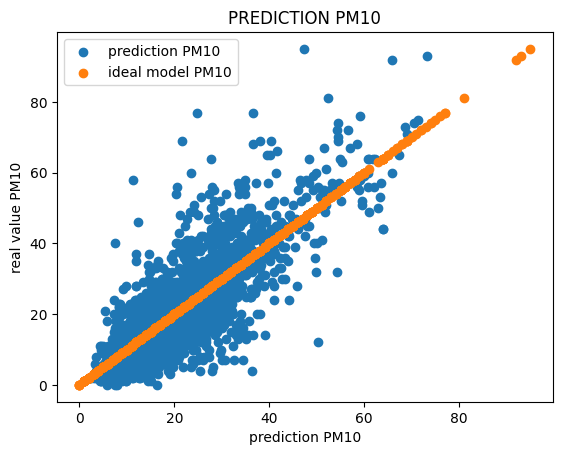

Biossido di Azoto


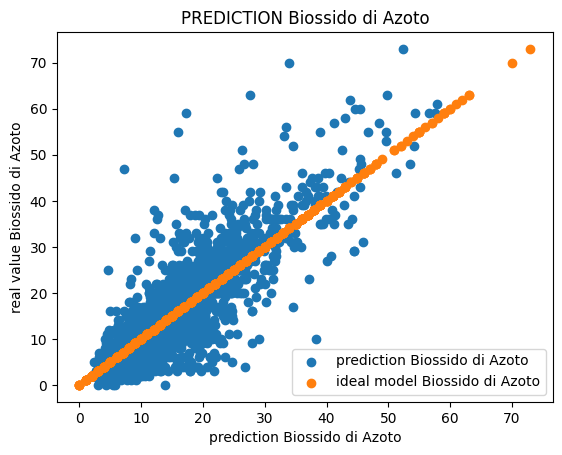

Biossido Zolfo


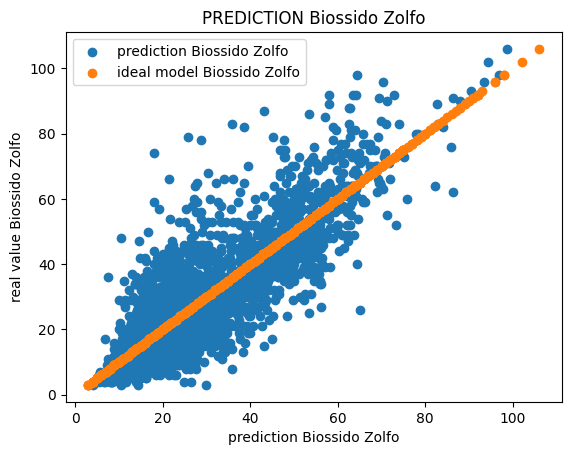

PM2.5


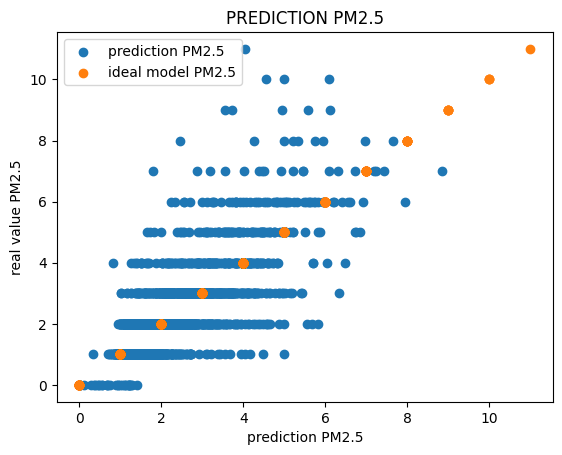

Ozono


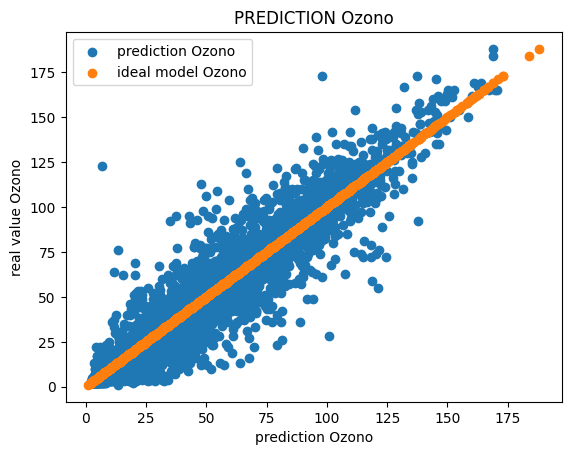

R-squared: 0.9625824812250272
MSE:  0.00401721996116001
RMSE:  0.002008609980580005
PM10


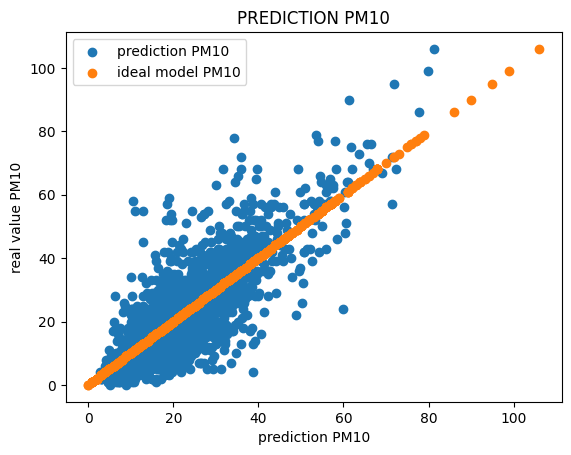

Biossido di Azoto


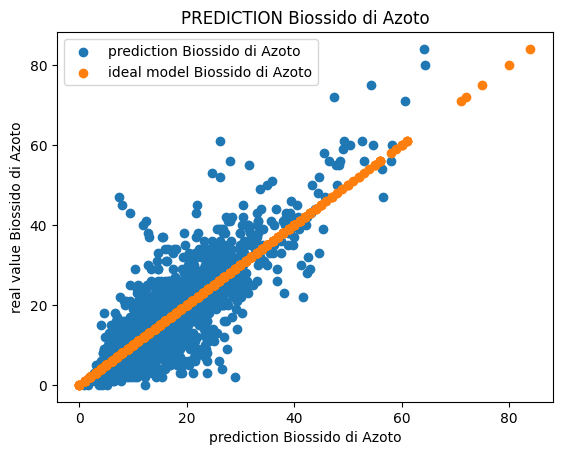

Biossido Zolfo


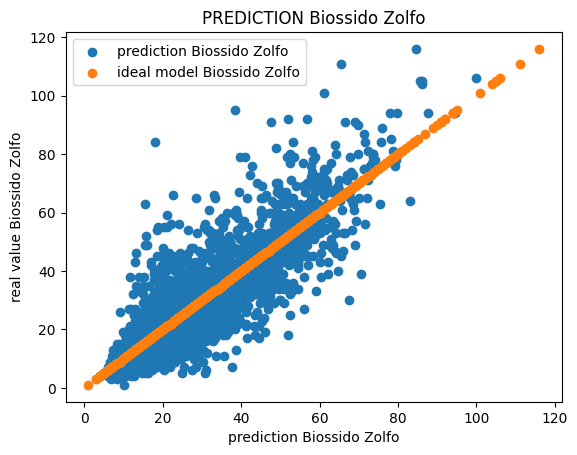

PM2.5


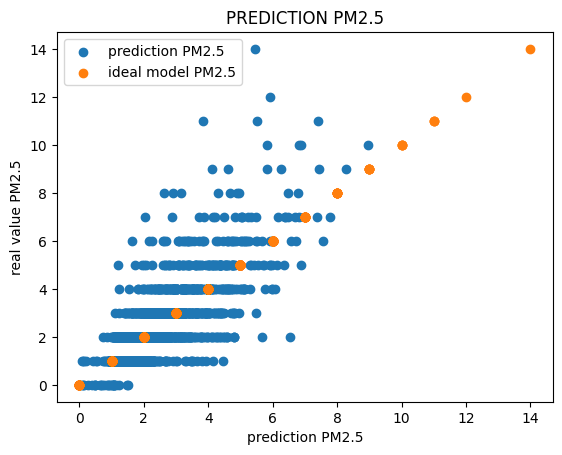

Ozono


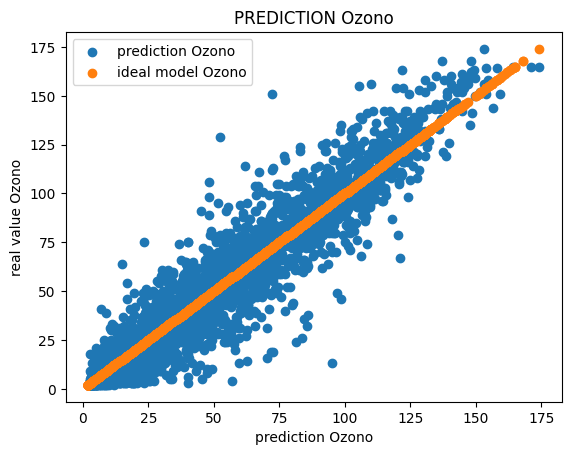

R-squared: 0.9626474729952429
MSE:  0.004176202091591289
RMSE:  0.0020881010457956444
PM10


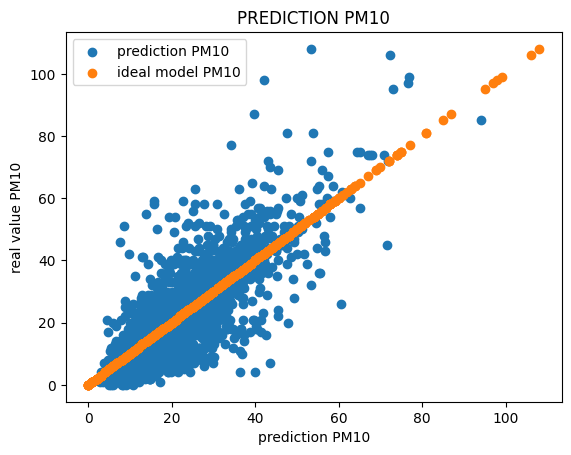

Biossido di Azoto


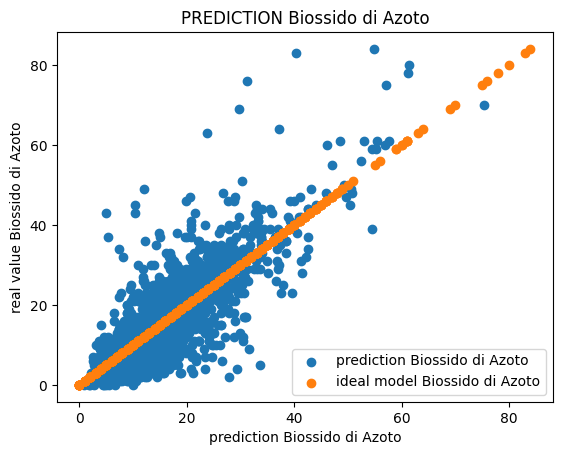

Biossido Zolfo


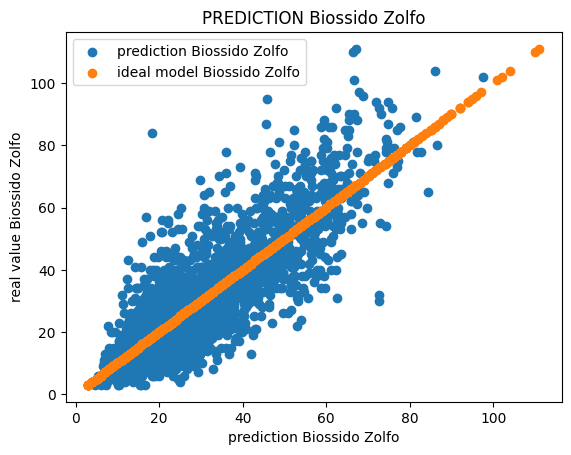

PM2.5


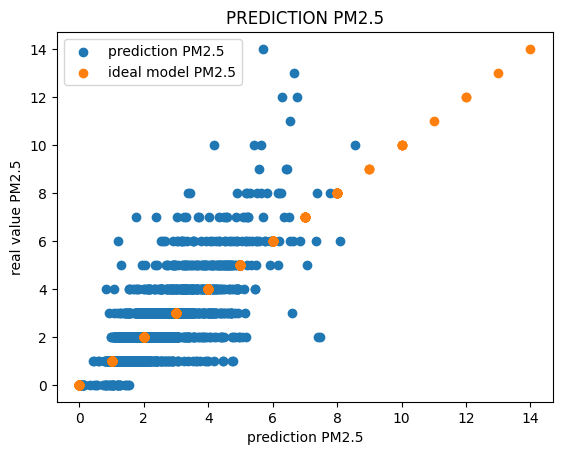

Ozono


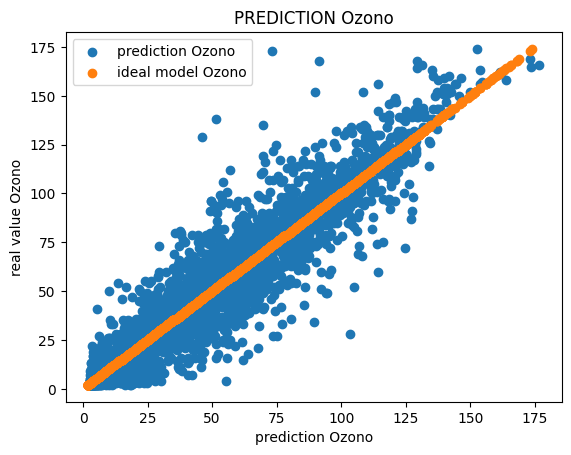

R-squared: 0.9629900608572267
MSE:  0.004594749212579441
RMSE:  0.0022973746062897207
PM10


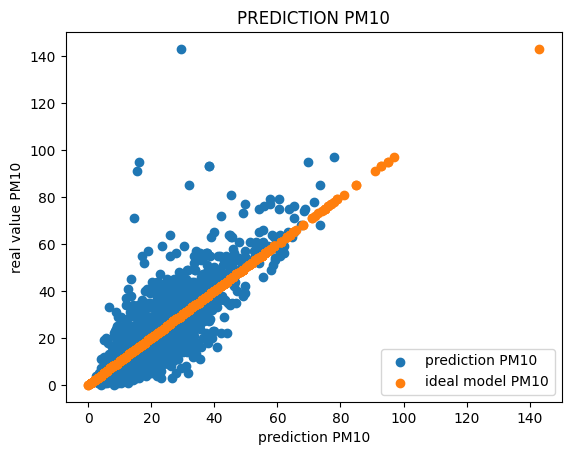

Biossido di Azoto


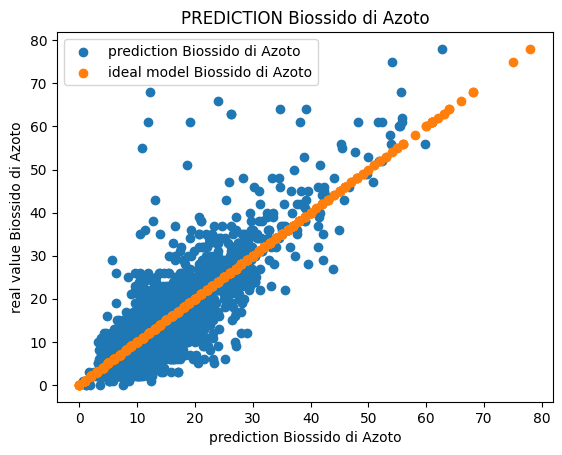

Biossido Zolfo


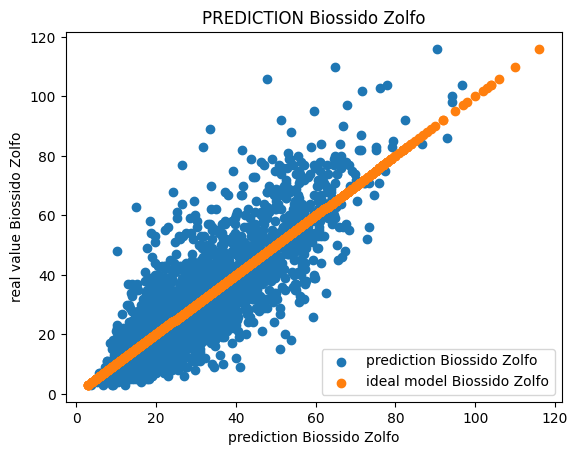

PM2.5


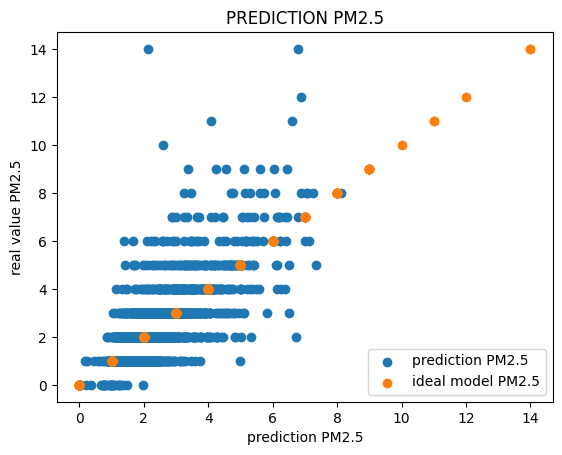

Ozono


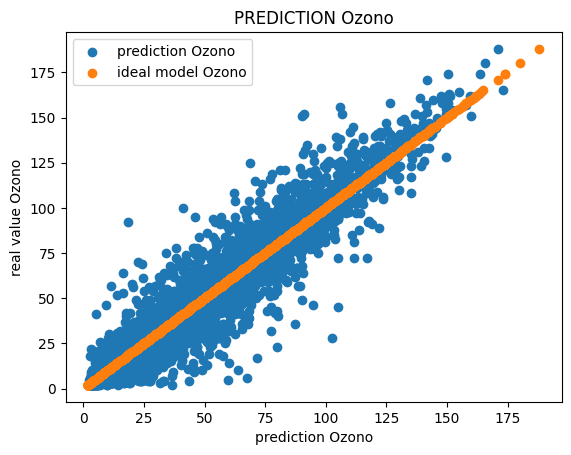

R-squared: 0.9621961955259009
MSE:  0.004420806371657064
RMSE:  0.002210403185828532
PM10


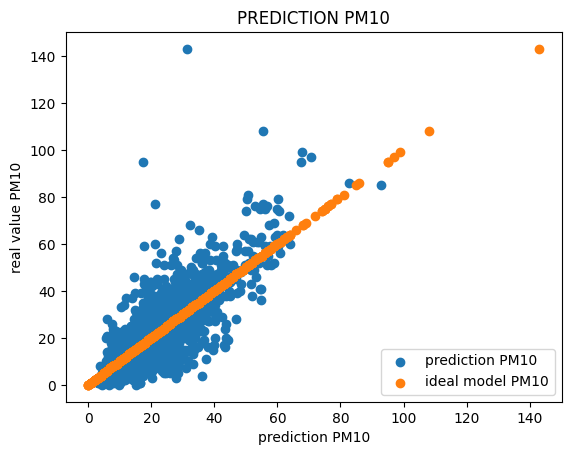

Biossido di Azoto


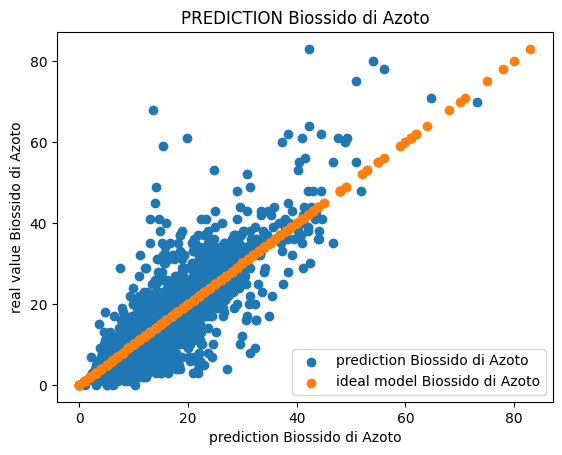

Biossido Zolfo


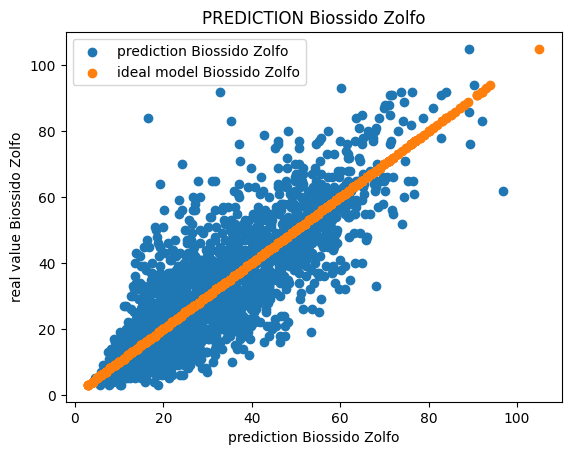

PM2.5


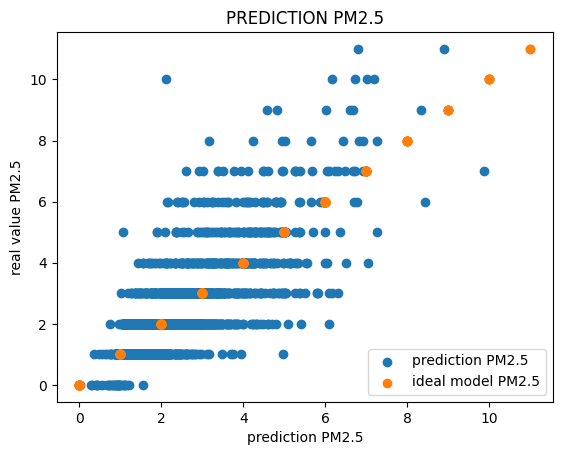

Ozono


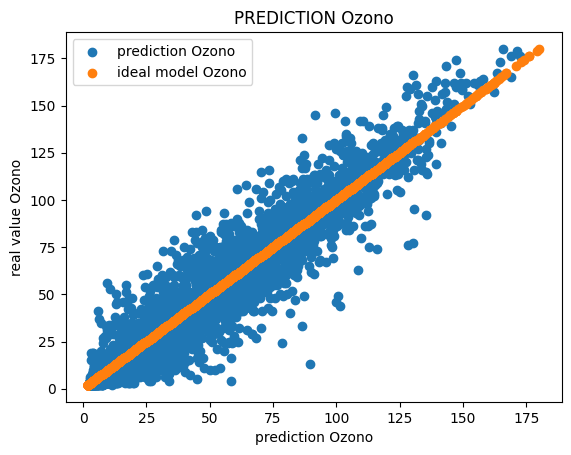

R-squared: 0.9632218712332739
MSE:  0.004413808674613295
RMSE:  0.0022069043373066474
PM10


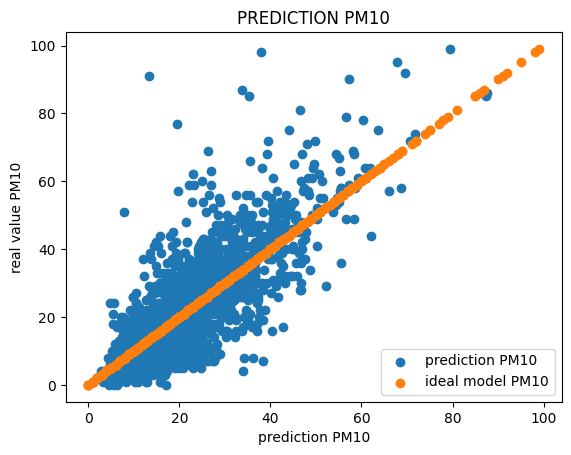

Biossido di Azoto


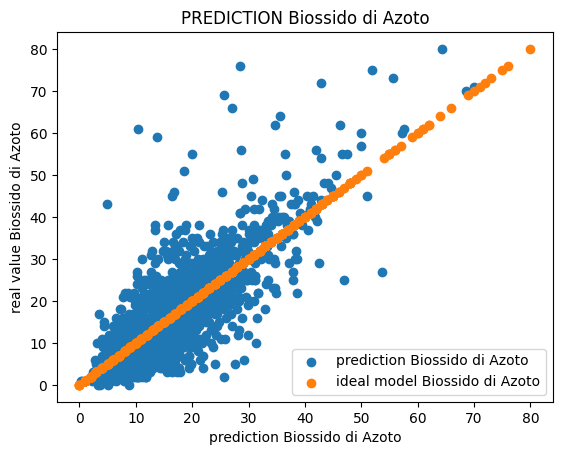

Biossido Zolfo


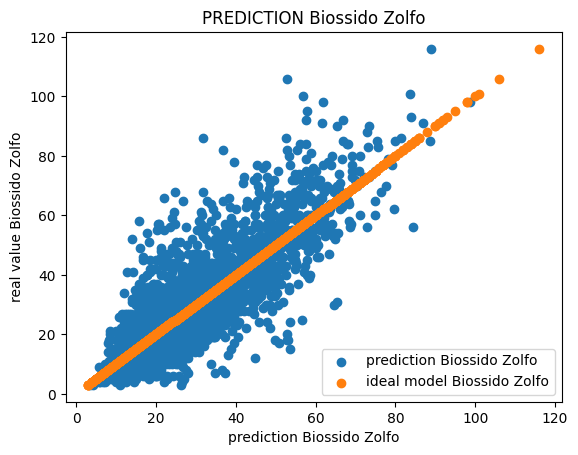

PM2.5


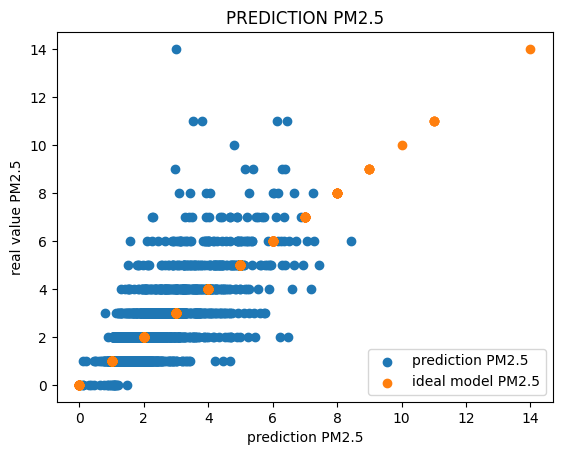

Ozono


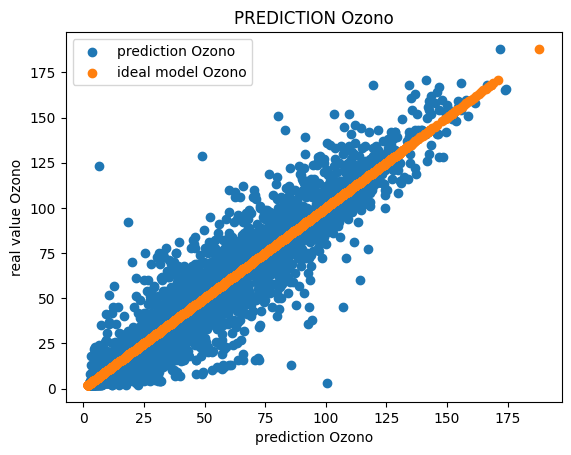

R-squared: 0.9625956438646961
MSE:  0.004042895215101837
RMSE:  0.0020214476075509184
PM10


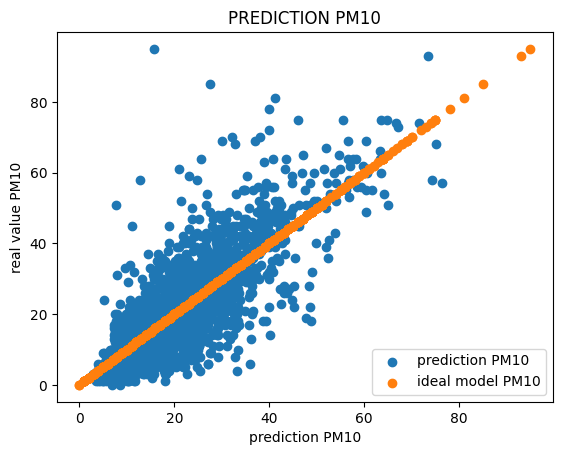

Biossido di Azoto


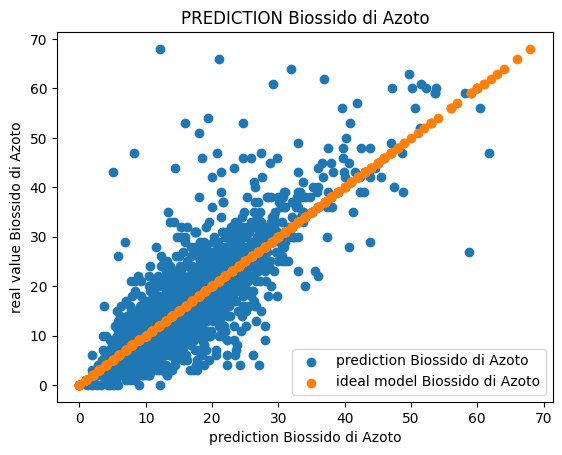

Biossido Zolfo


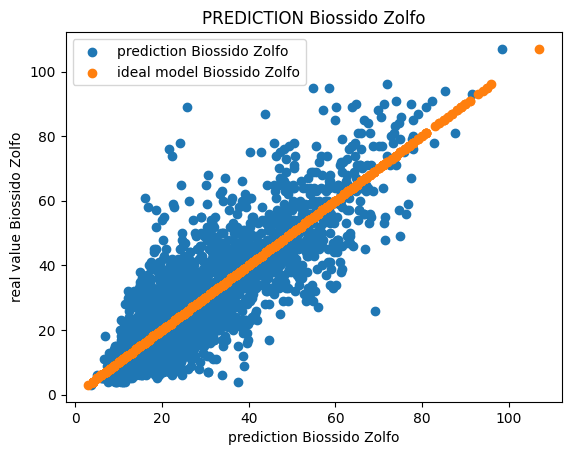

PM2.5


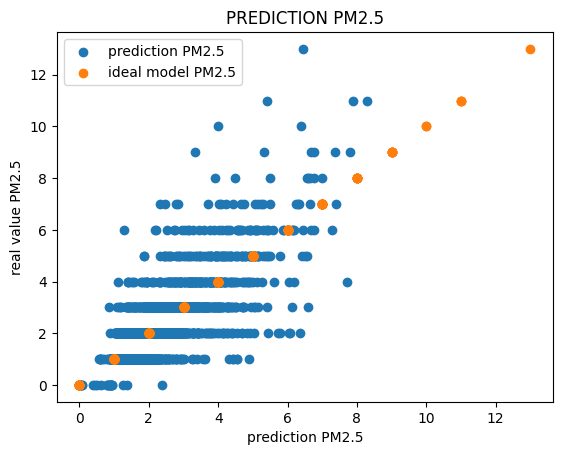

Ozono


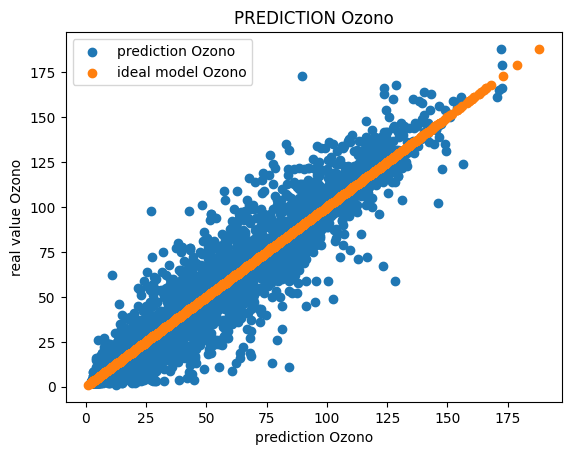

R-squared: 0.962424538829391
MSE:  0.003952325176228436
RMSE:  0.001976162588114218
PM10


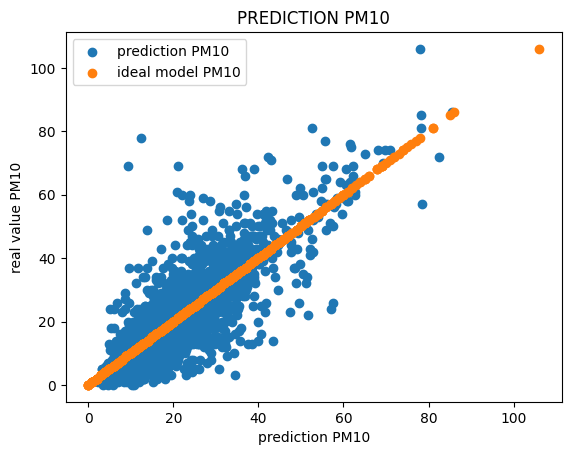

Biossido di Azoto


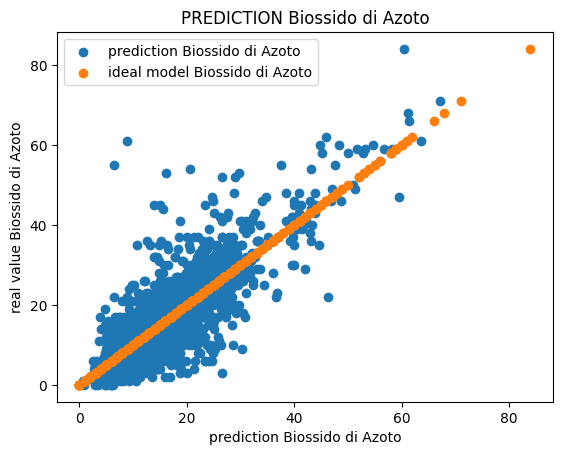

Biossido Zolfo


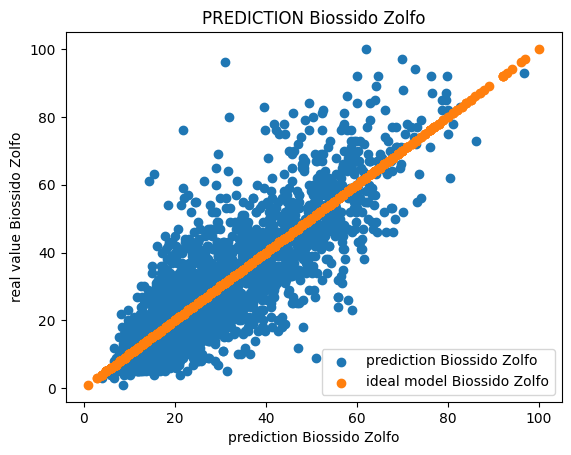

PM2.5


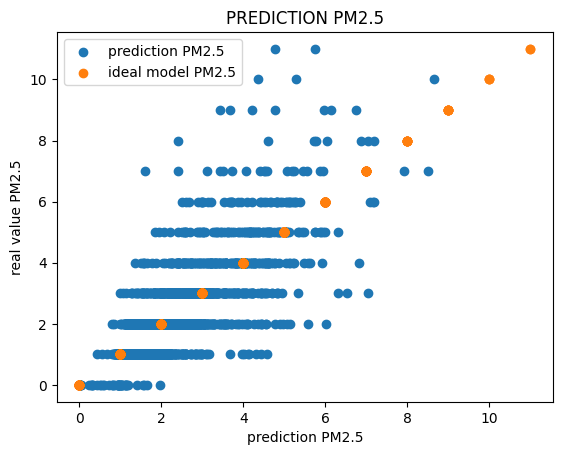

Ozono


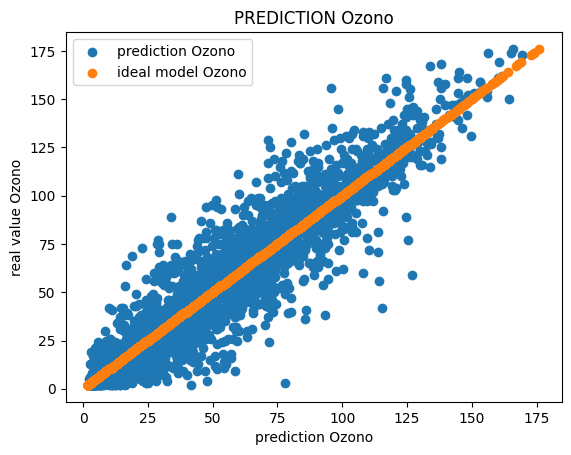

R-squared: 0.9621351042324825
MSE:  0.003981911870724495
RMSE:  0.0019909559353622477
PM10


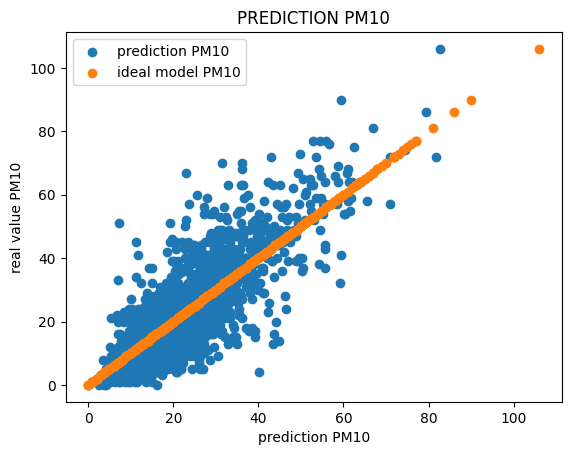

Biossido di Azoto


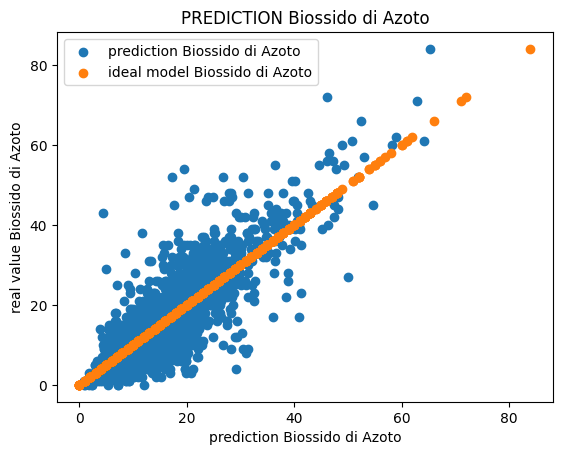

Biossido Zolfo


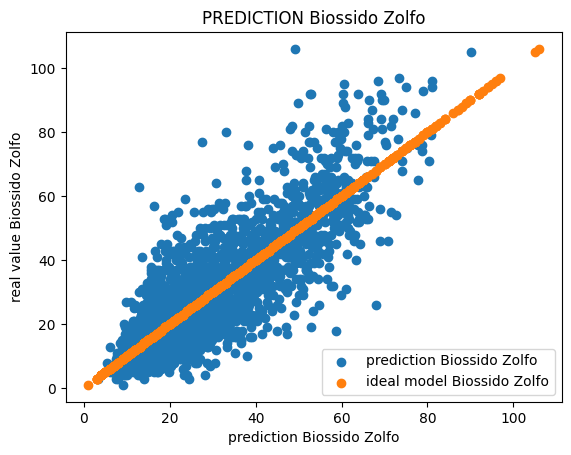

PM2.5


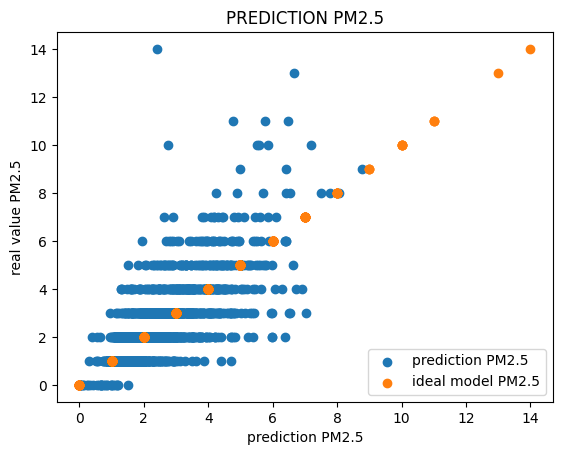

Ozono


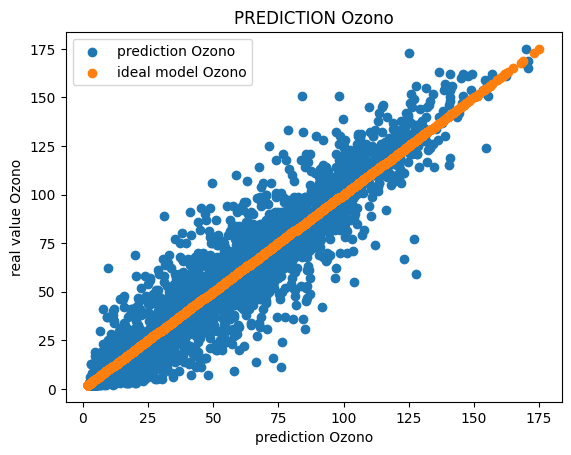

R-squared: 0.9618477422436623
MSE:  0.004152832616741842
RMSE:  0.002076416308370921
PM10


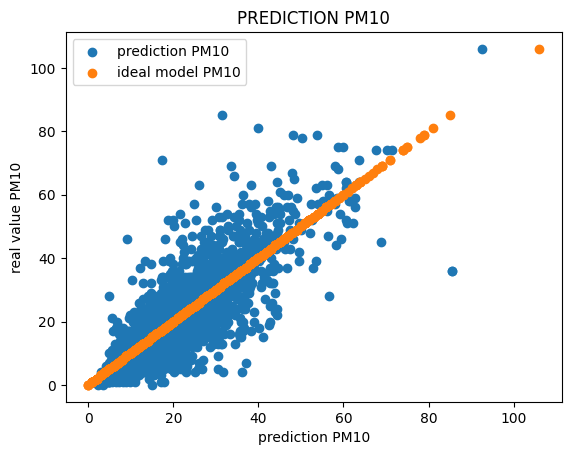

Biossido di Azoto


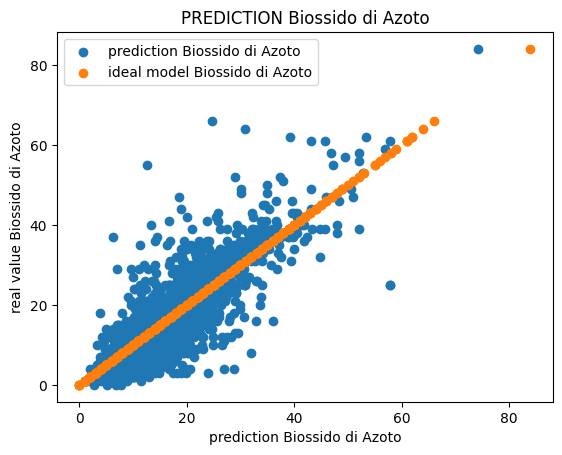

Biossido Zolfo


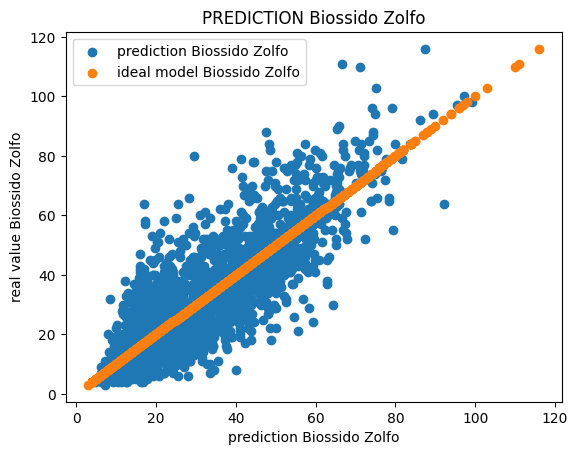

PM2.5


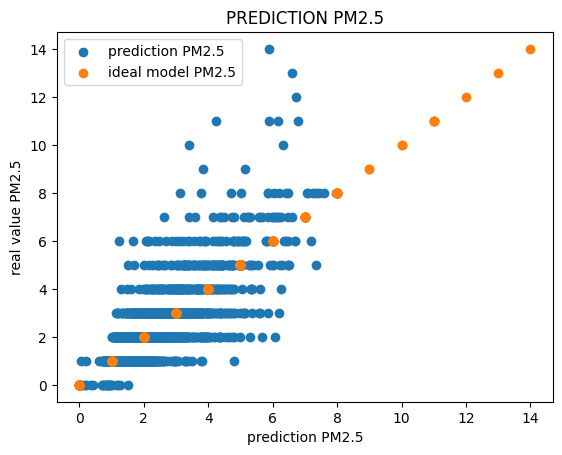

Ozono


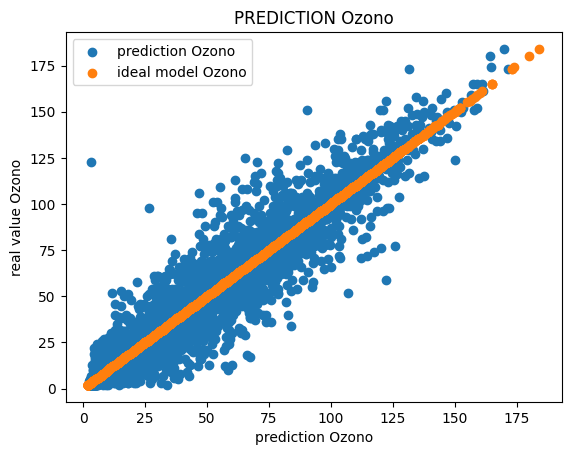

In [39]:
ind=0
lista_pollutant=[df1_StChiara, df4_StChiara, df5_StChiara, df7_StChiara, df8_StChiara, df11_StChiara, df12_StChiara, df13_StChiara, df14_StChiara, df15_StChiara] #df 9 and 10 are TBD

def tempo(df):
    timezone_offset = datetime.timedelta(hours=2)
    timezone = datetime.timezone(timezone_offset)
    df.ts = df.ts.apply(lambda x: x.replace(tzinfo=timezone))
    return df.ts
dfSC=dfSC.reset_index()
dfSC.ts=tempo(dfSC)
data_ini= ["2021-01-13", "2021-01-13", "2021-01-13", "2021-06-30", "2022-01-14", "2021-01-13", "2022-06-30", "2022-01-14", "2023-02-08", "2023-02-08"]
data_fini=["2023-02-08", "2023-06-26", "2021-04-29", "2023-06-26", "2023-06-26", "2023-06-26", "2023-02-08", "2023-06-26", "2023-06-26", "2023-06-26"]
for i in lista_pollutant: 
    df_tot = dfAPPA.merge(lista_pollutant[ind].reset_index())

    df_tot = df_tot.set_index("ts")
    df_tot = df_tot.sort_index()
    df_tot = df_tot.dropna()
    df_tot = df_tot.reset_index()
    df_tot.ts=tempo(df_tot)

    DFTOT = df_tot.merge(dfSC[["ts","T", "RH", "P", "IAQ"]])

    try:
        DFTOT = DFTOT.set_index("ts")
    except:
        pass
    for i in DFTOT.columns:
        DFTOT[i] = pd.to_numeric(DFTOT[i],errors = "coerce" )
    DFTOT = DFTOT.dropna()

    DFTOT = DFTOT[data_ini[ind]:data_fini[ind]]

    X = DFTOT.drop(["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"], axis=1)

    y = DFTOT[["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"]].copy()

    try:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = len(y.columns)
    except:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM=1

    x_train, x_test, y_train, y_test=train_test_split(X, y, shuffle = True, test_size=0.20)
    scaler=MinMaxScaler()
    scaler2 = MinMaxScaler()
    scaler.fit(x_train)

    X_train = scaler.transform(x_train)
    X_test = scaler.transform(x_test)


    scaler2.fit(y_train)

    y_train = scaler2.transform(y_train)
    y_test = scaler2.transform(y_test)




    rfr = RandomForestRegressor()
    RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=10, max_features=3, max_leaf_nodes=None,
                        max_samples=0.1, min_impurity_decrease=0.0,
                        min_samples_leaf=0.01,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False) 

    rfr.fit(x_train, y_train)
    score = rfr.score(x_train, y_train)

    print("R-squared:", score) 

    ypred = rfr.predict(x_test)

    mse = mean_squared_error(y_test, ypred)
    print("MSE: ", mse)
    print("RMSE: ", mse*(1/2.0)) 
    y_test = scaler2.inverse_transform(y_test)
    ypred = scaler2.inverse_transform(ypred)


    pollutant1 = "PM10"
    pollutant2 = "Biossido di Azoto"
    pollutant3 = "Biossido Zolfo"
    pollutant4 = "PM2.5"
    pollutant5 = "Ozono"

    pollutants = [pollutant1,pollutant2,pollutant3,pollutant4,pollutant5]

    for i,pollutant in enumerate(pollutants):
        plt.scatter(
            ypred[:,i],
            y_test[:,i]
            ,label="prediction " + pollutant
        )
        
        plt.scatter(
            y_test[:,i],
            y_test[:,i]
            ,label="ideal model " + pollutant
        )
        print(pollutant)

        plt.xlabel("prediction " + pollutant)
        plt.ylabel("real value " + pollutant)
        plt.title("PREDICTION " + pollutant)

        plt.legend()
        plt.show()
ind += 1


R-squared: 0.9602453537360028
MSE:  0.0030783171435866414
RMSE:  0.0015391585717933207
PM10


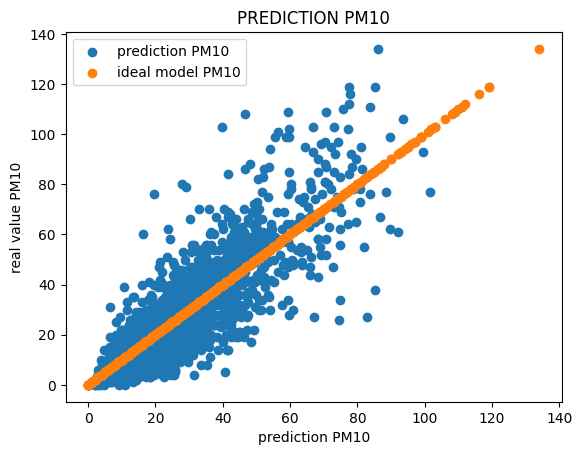

Biossido di Azoto


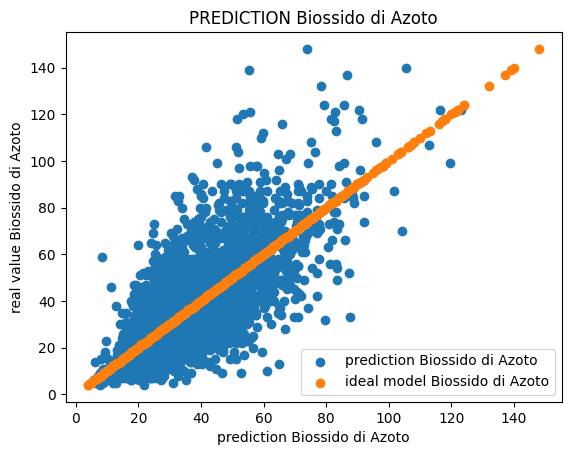

Ossido di Carbonio


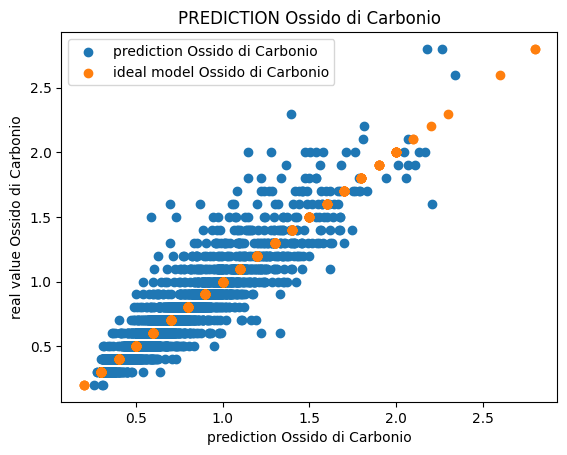

R-squared: 0.9487506757567367
MSE:  0.008033580000272988
RMSE:  0.004016790000136494
PM10


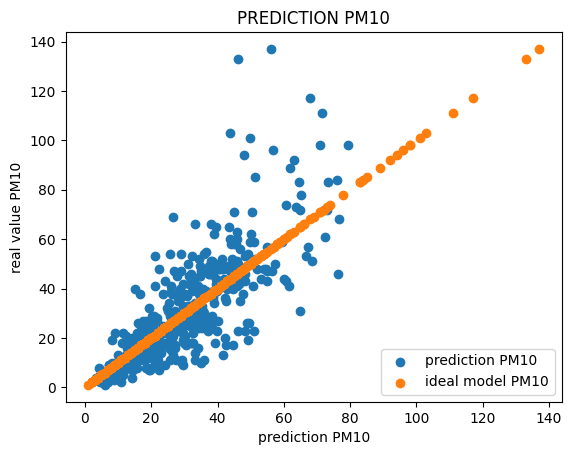

Biossido di Azoto


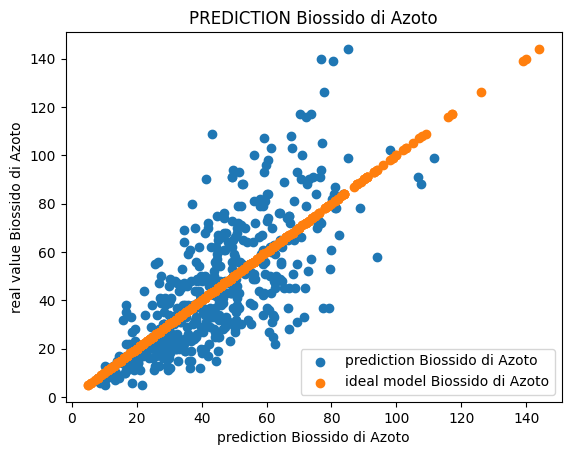

Ossido di Carbonio


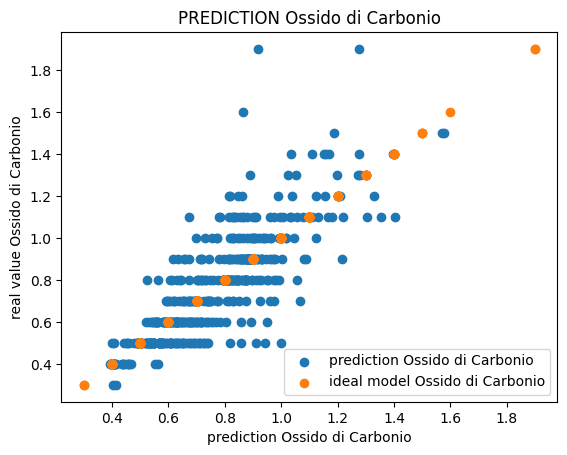

R-squared: 0.9596412241091982
MSE:  0.005778052489040002
RMSE:  0.002889026244520001
PM10


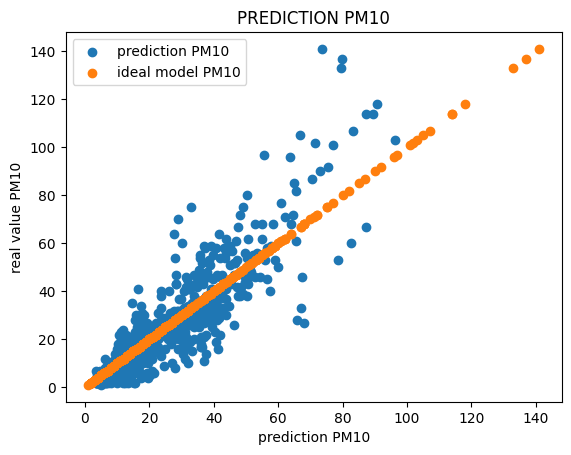

Biossido di Azoto


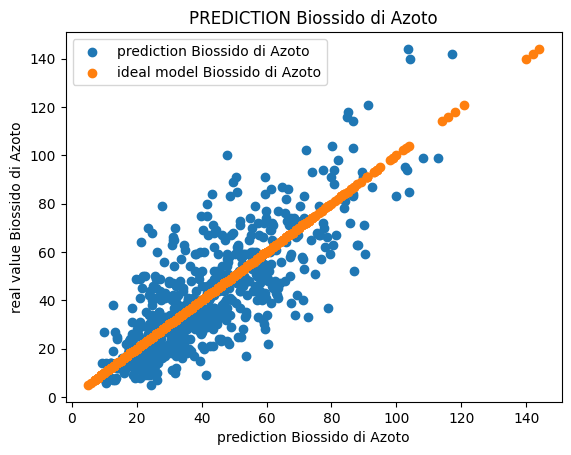

Ossido di Carbonio


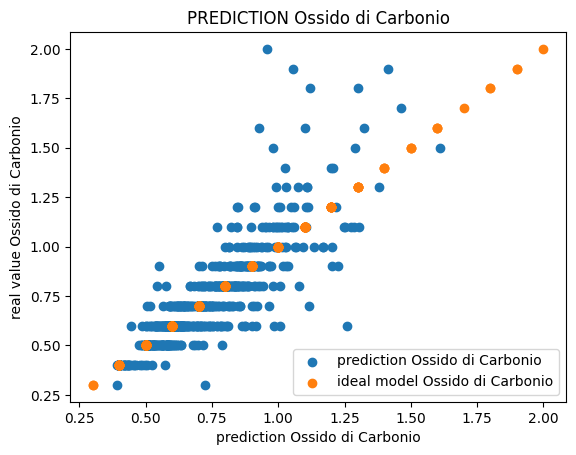

R-squared: 0.9677832343150053
MSE:  0.003267479958838066
RMSE:  0.001633739979419033
PM10


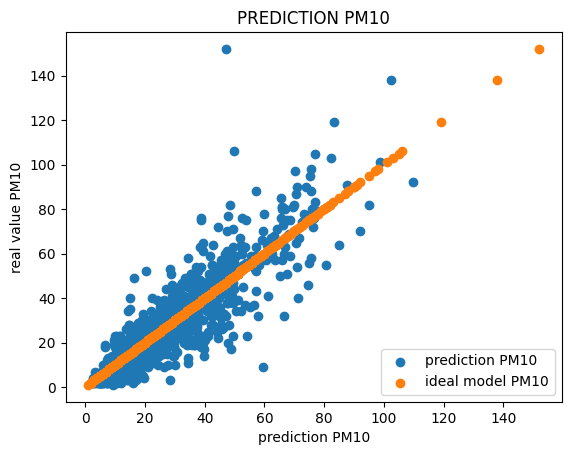

Biossido di Azoto


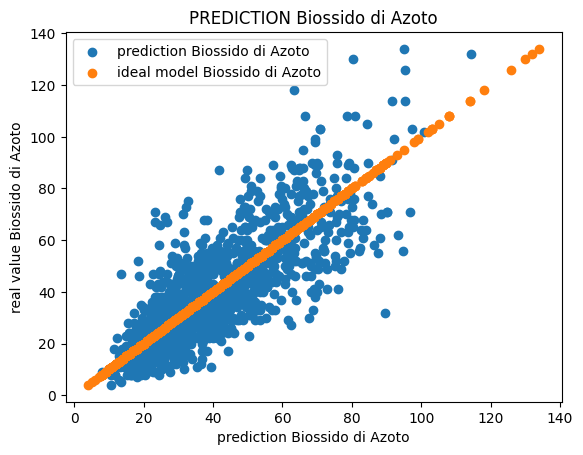

Ossido di Carbonio


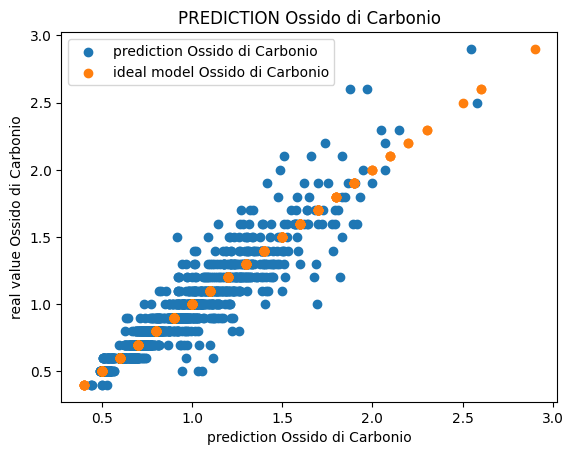

R-squared: 0.9538705507957949
MSE:  0.00703007857961772
RMSE:  0.00351503928980886
PM10


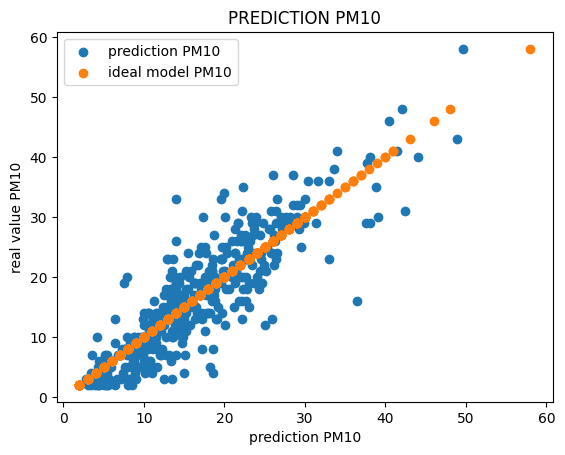

Biossido di Azoto


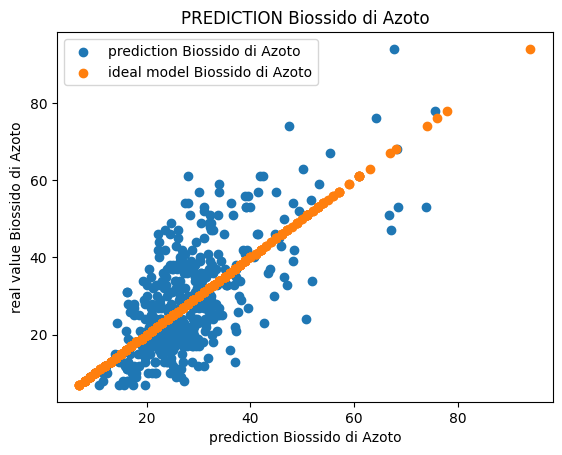

Ossido di Carbonio


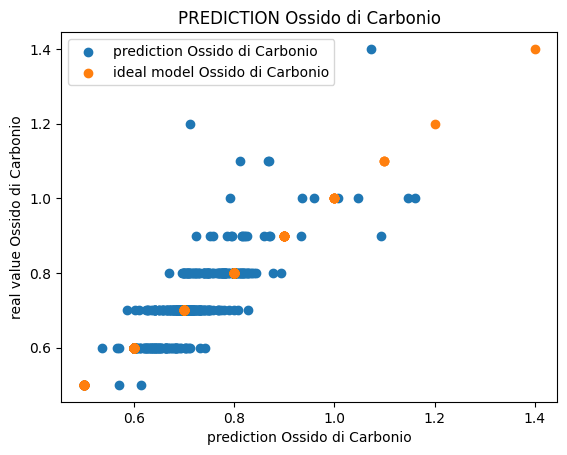

R-squared: 0.9644537084769901
MSE:  0.0030503097849608894
RMSE:  0.0015251548924804447
PM10


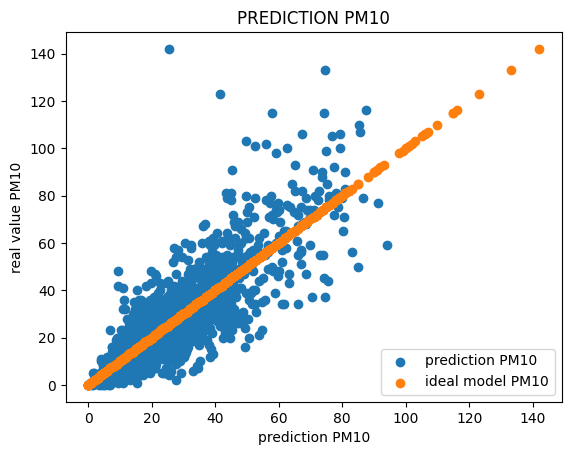

Biossido di Azoto


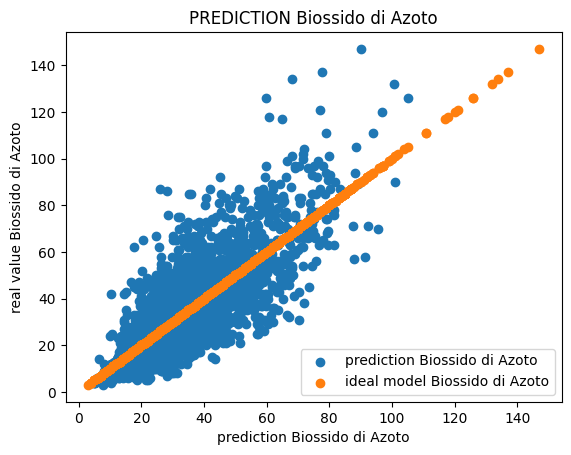

Ossido di Carbonio


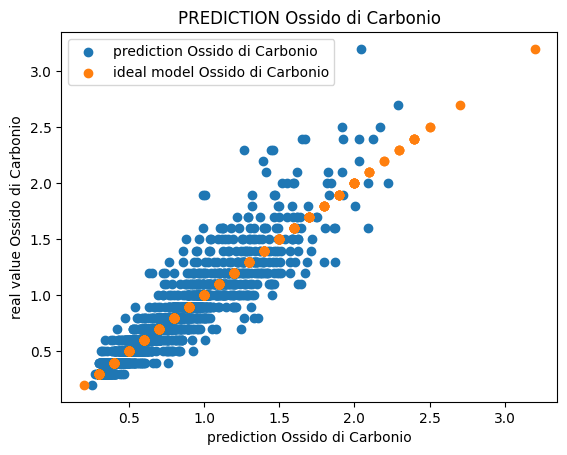

R-squared: 0.9472860260193418
MSE:  0.0048073124158231895
RMSE:  0.0024036562079115947
PM10


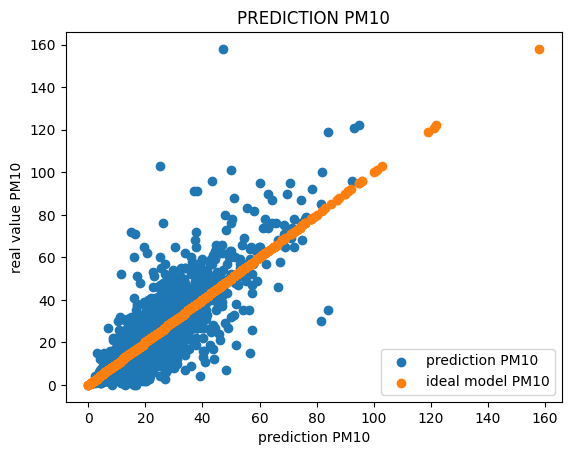

Biossido di Azoto


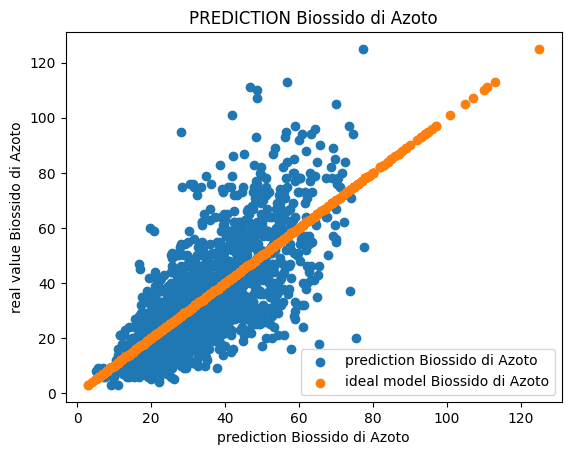

Ossido di Carbonio


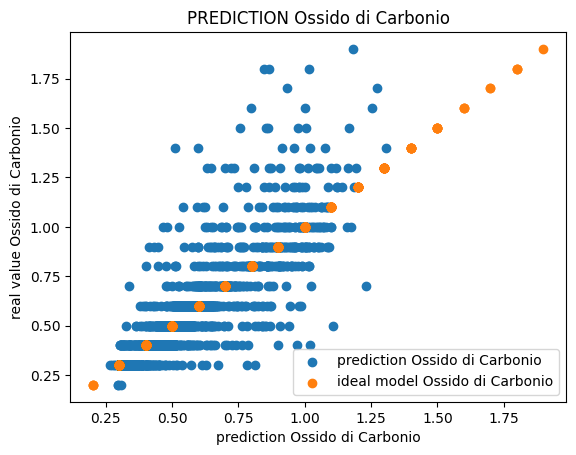

R-squared: 0.9649055148149173
MSE:  0.003493461324987148
RMSE:  0.001746730662493574
PM10


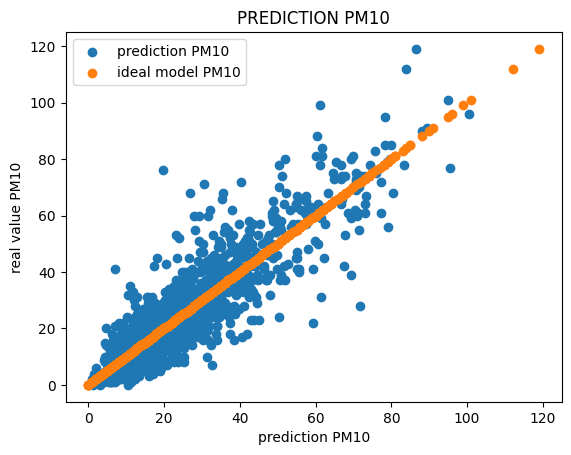

Biossido di Azoto


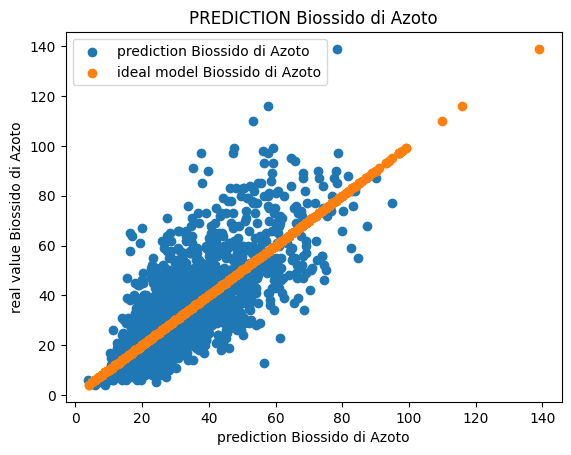

Ossido di Carbonio


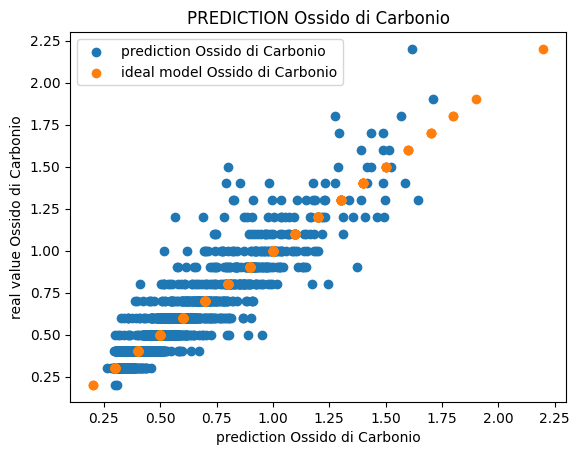

In [42]:
ind=0
lista_pollutant1=[df1, df4, df5, df8, df10, df11, df12, df14]

def tempo(df):
    timezone_offset = datetime.timedelta(hours=2)
    timezone = datetime.timezone(timezone_offset)
    df.ts = df.ts.apply(lambda x: x.replace(tzinfo=timezone))
    return df.ts
df_ViaBolz=df_ViaBolz.reset_index()
df_ViaBolz.ts=tempo(df_ViaBolz)
data_ini1= ["2021-01-13", "2021-01-13", "2021-01-13", "2021-06-30", "2021-04-29", "2021-06-30", "2022-02-24", "2022-02-24"]
data_fini1=["2023-06-26", "2021-04-29", "2021-06-30", "2023-05-24", "2022-02-24", "2023-06-26", "2023-06-26", "2023-06-26"]
for i in lista_pollutant1: 
    df_tot1 = dfAPPA2.merge(lista_pollutant1[ind].reset_index())

    df_tot1 = df_tot1.set_index("ts")
    df_tot1 = df_tot1.sort_index()
    df_tot1 = df_tot1.dropna()
    df_tot1 = df_tot1.reset_index()
    df_tot1.ts=tempo(df_tot1)

    DFTOT1 = df_tot1.merge(df_ViaBolz[["ts","T", "RH", "P"]])

    try:
        DFTOT1 = DFTOT1.set_index("ts")
    except:
        pass
    
    for i in DFTOT1.columns:
        DFTOT1[i] = pd.to_numeric(DFTOT1[i],errors = "coerce" )
    DFTOT1 = DFTOT1.dropna()

    DFTOT1 = DFTOT1[data_ini1[ind]:data_fini1[ind]]


    X = DFTOT1.drop(["PM10", "Biossido di Azoto", "Ossido di Carbonio"], axis=1)

    y = DFTOT1[["PM10", "Biossido di Azoto", "Ossido di Carbonio"]].copy()

    try:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = len(y.columns)
    except:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM=1

    x_train, x_test, y_train, y_test=train_test_split(X, y, shuffle = True, test_size=0.20)
    scaler=MinMaxScaler()
    scaler2 = MinMaxScaler()
    scaler.fit(x_train)

    X_train = scaler.transform(x_train)
    X_test = scaler.transform(x_test)


    scaler2.fit(y_train)

    y_train = scaler2.transform(y_train)
    y_test = scaler2.transform(y_test)




    rfr = RandomForestRegressor()
    RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=10, max_features=3, max_leaf_nodes=None,
                        max_samples=0.1, min_impurity_decrease=0.0,
                        min_samples_leaf=0.01,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False) 

    rfr.fit(x_train, y_train)
    score = rfr.score(x_train, y_train)

    print("R-squared:", score) 

    ypred = rfr.predict(x_test)

    mse = mean_squared_error(y_test, ypred)
    print("MSE: ", mse)
    print("RMSE: ", mse*(1/2.0)) 
    y_test = scaler2.inverse_transform(y_test)
    ypred = scaler2.inverse_transform(ypred)


    pollutant1 = "PM10"
    pollutant2 = "Biossido di Azoto"
    pollutant3 = "Ossido di Carbonio"

    pollutants = [pollutant1,pollutant2,pollutant3]

    for i,pollutant in enumerate(pollutants):
        plt.scatter(
            ypred[:,i],
            y_test[:,i]
            ,label="prediction " + pollutant
        )
        
        plt.scatter(
            y_test[:,i],
            y_test[:,i]
            ,label="ideal model " + pollutant
        )
        print(pollutant)

        plt.xlabel("prediction " + pollutant)
        plt.ylabel("real value " + pollutant)
        plt.title("PREDICTION " + pollutant)

        plt.legend()
        plt.show()
    ind += 1
